# import needed liberaries

In [2]:
import numpy as np
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from arabert.preprocess import ArabertPreprocessor

# Importing Dataset
##Directly importing the dataset from https://huggingface.co/datasets/nedjmaou/MLMA_hate_speech is a good place to start. 3.353 Arabic comments with the categories "normal," "offensive" (not normal), "abusive_offensive," etc. are included in the huggingface dataset. Our objective is to develop a machine learning model that can predict the type of comments based on the dataset's content and label.

In [3]:
#reading data
ar_harass=pd.read_csv('ar_dataset.csv')

In [4]:
#display the first 50 rows of the dataset
ar_harass.head(50)

,HITId,tweet,sentiment,directness,annotator_sentiment,target,group
0,1,صلاة الفجر خير لك من ترديد بول البعير وسبي الن...,hateful_normal,indirect,shock,gender,individual
1,2,صراحة نفسي اشوف ولاد الوسخة اللي قالوا مدرب اج...,offensive,indirect,anger_confusion_sadness_indifference_disgust,other,other
2,3,طيب! هي متبرجة وعبايتها ملونه وطالعة من بيتهم ...,offensive,indirect,indifference,other,individual
3,4,@user @user انا اوافقك بخصوص السوريين و العراق...,normal,direct,indifference,origin,other
4,5,هذه السعودية التي شعبها شعب الخيم و بول البعير...,normal,indirect,indifference,origin,other
5,6,ما عارف كنت شايفها منحرفة شديد وانا صغير ليه @url,offensive_disrespectful,direct,indifference,gender,individual
6,7,@user @user تخيل يرد عليك يقولك حسب معلوماتنا ...,offensive_normal,indirect,shock,other,individual
7,8,صباح التوكل على الله والسعي على رزقه والثقة في...,normal,indirect,indifference,other,other
8,9,وانتي مال امك يا مطلقة يا بايرة ياوش قنوات @url,offensive_disrespectful,direct,disgust,gender,women
9,10,@user @user الكردي كلب من يوم يومه بحاجة دائما...,hateful,direct,shock_disgust,origin,other


# After reading the dataset, notice that there are a few extra columns that we don’t need. We only need the second and third column. Let’s go ahead and drop the remaining columns and also rename the first two columns.

In [5]:
#Drop/Eliminate unneeded features (columns).
ar_harass=ar_harass.drop(['directness','annotator_sentiment','target','group','HITId'],axis=1) #drop unnecessary cols

In [6]:
#store copy of the dataframe without 'fearful' sentiment classification
ar_harass = ar_harass[ar_harass.sentiment != 'fearful']

In [7]:
#display first 5 rows
ar_harass.head()

,tweet,sentiment
0,صلاة الفجر خير لك من ترديد بول البعير وسبي الن...,hateful_normal
1,صراحة نفسي اشوف ولاد الوسخة اللي قالوا مدرب اج...,offensive
2,طيب! هي متبرجة وعبايتها ملونه وطالعة من بيتهم ...,offensive
3,@user @user انا اوافقك بخصوص السوريين و العراق...,normal
4,هذه السعودية التي شعبها شعب الخيم و بول البعير...,normal


In [8]:
#This line of code creates a new list z containing the unique values 
#of the sentiment column in the ar_harass DataFrame. 

#ar_harass.sentiment: 
#*This selects the sentiment column from the ar_harass DataFrame.
#*.drop_duplicates(): This removes any duplicate values from the selected 
#column.
#list(): This converts the resulting pandas Series to a Python list.
#z = ...: This assigns the resulting list to a new variable named z.

z=list(ar_harass.sentiment.drop_duplicates())

In [9]:
#This line of code removes the string 'normal' from the list z.
z.remove('normal')

In [10]:
#replace any sentiment category to 'offensive'
ar_harass['sentiment']=ar_harass.sentiment.replace(z, 'offensive')

In [11]:
ar_harass.head(14)

,tweet,sentiment
0,صلاة الفجر خير لك من ترديد بول البعير وسبي الن...,offensive
1,صراحة نفسي اشوف ولاد الوسخة اللي قالوا مدرب اج...,offensive
2,طيب! هي متبرجة وعبايتها ملونه وطالعة من بيتهم ...,offensive
3,@user @user انا اوافقك بخصوص السوريين و العراق...,normal
4,هذه السعودية التي شعبها شعب الخيم و بول البعير...,normal
5,ما عارف كنت شايفها منحرفة شديد وانا صغير ليه @url,offensive
6,@user @user تخيل يرد عليك يقولك حسب معلوماتنا ...,offensive
7,صباح التوكل على الله والسعي على رزقه والثقة في...,normal
8,وانتي مال امك يا مطلقة يا بايرة ياوش قنوات @url,offensive
9,@user @user الكردي كلب من يوم يومه بحاجة دائما...,offensive


# Exploratory Data Analysis (EDA)
##Let’s do some basic EDA to see if there are missing values in the dataset and what’s the target balance.

In [12]:
#check missing values
ar_harass.isna().sum()

tweet        0
sentiment    0
dtype: int64

In [13]:
#check data shape
ar_harass.shape

(3341, 2)

In [14]:
#print the 5 free columns
ar_harass.head()

,tweet,sentiment
0,صلاة الفجر خير لك من ترديد بول البعير وسبي الن...,offensive
1,صراحة نفسي اشوف ولاد الوسخة اللي قالوا مدرب اج...,offensive
2,طيب! هي متبرجة وعبايتها ملونه وطالعة من بيتهم ...,offensive
3,@user @user انا اوافقك بخصوص السوريين و العراق...,normal
4,هذه السعودية التي شعبها شعب الخيم و بول البعير...,normal


<AxesSubplot: >

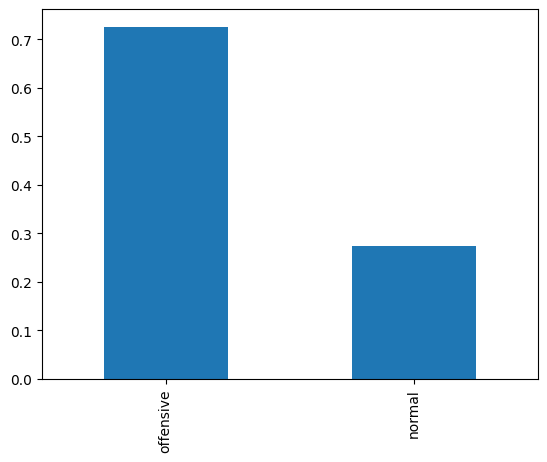

In [29]:
# check target balance
ar_harass['sentiment'].value_counts(normalize = True).plot.bar()

# Text Preprocessing
##This is where all text cleaning takes place.and does the following:
##-Remove all special characters
##-Lowercase all the words
##-Tokenize
##-Remove stopwords
##-Lemmatize

# text preproc

In [30]:
#text preprocessing 
#import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\AALAA\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\AALAA\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\AALAA\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\AALAA\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\AALAA\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\bas

[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\AALAA\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nonbreaking_prefixes.zip.
[nltk_data]    | Downloading package nps_chat to
[nltk_data]    |     C:\Users\AALAA\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nps_chat.zip.
[nltk_data]    | Downloading package omw to
[nltk_data]    |     C:\Users\AALAA\AppData\Roaming\nltk_data...
[nltk_data]    |   Package omw is already up-to-date!
[nltk_data]    | Downloading package omw-1.4 to
[nltk_data]    |     C:\Users\AALAA\AppData\Roaming\nltk_data...
[nltk_data]    |   Package omw-1.4 is already up-to-date!
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     C:\Users\AALAA\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\opinion_lexicon.zip.
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\AALAA\AppData\Roaming\nltk_data...
[nltk_data]  

[nltk_data]    | Downloading package verbnet to
[nltk_data]    |     C:\Users\AALAA\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\verbnet.zip.
[nltk_data]    | Downloading package verbnet3 to
[nltk_data]    |     C:\Users\AALAA\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\verbnet3.zip.
[nltk_data]    | Downloading package webtext to
[nltk_data]    |     C:\Users\AALAA\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\webtext.zip.
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\AALAA\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\wmt15_eval.zip.
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\AALAA\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\word2vec_sample.zip.
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     C:\Users\AALAA\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet is already up-t

True

In [35]:
#Text standarisation
from nltk.corpus import stopwords
from textblob import TextBlob
import re
from tashaphyne.stemming import ArabicLightStemmer
from nltk.stem.isri import ISRIStemmer

#get stop words of Arabic language
stops = set(stopwords.words("arabic"))
stop_word_comp = {"،","آض","آمينَ","آه","آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل","أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك","إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق","اذا","اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين","اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع","بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى","بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي","حتى","حرى","حسب","حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات","ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع","رويدك","ريث","رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ","صار","صباح","صفر","صهٍ","صهْ","ضد","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا","عدة","عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين","عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد","قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت","كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما","لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي","لكيلا","للامم","لم","لما","لمّا","لن","لنا","له","لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ","لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا","مازال","مافتئ","مايو","متى","مثل","مذ","مساء","مع","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليون","مما","ممن","من","منذ","منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم","هاكَ","هاهنا","هبّ","هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا","هيت","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد","واضاف","واضافت","واكد","وان","واهاً","واوضح","وراءَك","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","ّأيّان"}

'''
a function from the tashaphyne library that performs light stemming on Arabic text.
Stemming is the process of reducing words to their base or root form.
Light stemming is a less aggressive form of stemming that only removes prefixes and suffixes from words.
'''
ArListem = ArabicLightStemmer()


In [36]:
def stem(text):
    #creates a TextBlob object from it using the TextBlob(text) constructor
    zen = TextBlob(text)
    
    #retrieves the words in the text using the .words attribute of the TextBlob object.
    words = zen.words
    
    #empty list
    cleaned = list()
    
    #iterate over each word in the list of words
    for w in words:
        
        #apply light stemming to the word 
        ArListem.light_stem(w)
        
        #appends the resulting root word to the cleaned list using the .get_root() method.
        cleaned.append(ArListem.get_root())
        
    '''the function returns a string that is created by 
    joining all of the elements in the cleaned list together with spaces'''
    return " ".join(cleaned)

In [282]:
import pyarabic.araby as araby
def normalizeArabic(text):
    
    #strips any leading or trailing whitespace using the .strip() method
    text = text.strip()
    
    #performs a series of regular expression substitutions on the text using the re.sub() method.
    
    '''The below four substitutions replace various Arabic characters 
    with the Arabic letter “ا” (alef) using regular expressions. '''
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    
    '''replaces the Arabic letter “ة” (tah) 
    with the Arabic letter “ه” (ha).'''
    text = re.sub("ة", "ه", text)
    
    ''' removes diacritics (tashkeel) from the text using a regular 
    expression pattern.'''
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    
    '''remove any repeated characters in the text using a regular expression pattern.'''
    text = re.sub(noise, '', text)
    
    # Remove longation
    text = re.sub(r'(.)\1+', r"\1\1", text) 
    
    
    return araby.strip_tashkeel(text)

In [283]:
#function to remove all stop words from an input text
def remove_stop_words(text):
    
    #creates a TextBlob object from it using the TextBlob(text) constructor
    zen = TextBlob(text)
    
    #retrieves the words in the text using the .words attribute of the TextBlob object.
    words = zen.words
    
    '''The function also checks if the length of each word is greater than or equal to 2 
    before adding it to the new string2.'''
    return " ".join([w for w in words if not w in stops and not w in stop_word_comp and len(w) >= 2])

In [37]:
#Deal with Hashtags in a string
def split_hashtag_to_words(tag):
    
    #It first removes the ‘#’ character from the input string
    tag = tag.replace('#','')
    
    #it splits the resulting string into a list of words
    tags = tag.split('_')
    
    #f the resulting list has more than one element
    if len(tags) > 1 :
        #it is returned as is.
        return tags
    
    #Otherwise, the function uses a regular expression pattern to split the string into words. 
    pattern = re.compile(r"[A-Z][a-z]+|\d+|[A-Z]+(?![a-z])")
 
    return pattern.findall(tag)

def clean_hashtag(text):
    
    #The function first splits the input string into words
    words = text.split()
    
    #empty list
    text = list()
    
    #iterate along each word in the input text
    for word in words:
        
        #checks if each word is a hashtag 
        if is_hashtag(word): 
            
            #If it is a hashtag, it extracts the hashtag
            text.extend(extract_hashtag(word))
        else:#other wise (If it is not a hashtag)
            #it appends the word to a list.
            text.append(word)
    return " ".join(text)

def is_hashtag(word):
    
    #if the string starts with the “#” character
    if word.startswith("#"):
        return True
    else:
        return False

#extracts hashtags from a given text.
def extract_hashtag(text):
    
    '''The re.sub() method is used to remove any non-alphanumeric 
    characters at the end of each hashtag'''
    ''' split the text into words'''
    hash_list = ([re.sub(r"(\W+)$", "", i) for i in text.split() if i.startswith("#")])
    for word in hash_list :
        word_list.extend(split_hashtag_to_words(word))
    return word_list

In [38]:
#Dealing with emojis in a string
with open('emojis.csv','r',encoding='utf-8') as f:
    lines = f.readlines()
    emojis_ar = {}
    for line in lines:
        line = line.strip('\n').split(';')
        emojis_ar.update({line[0].strip():line[1].strip()})

In [39]:
from __future__ import unicode_literals

def remove_emoji(text):
    emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    return text

In [40]:
import emoji
def is_emoji(word):
    if word in emojis_ar:
        return True
    else:
        return False

In [41]:
def add_space(text):
    return ''.join(' ' + char if is_emoji(char) else char for char in text).strip()

In [42]:
def clean_tweet(text):
    text = re.sub('#\d+K\d+', ' ', text)  # years like 2K19
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('@[^\s]+',' ',text)
    text = clean_hashtag(text)
    return text

In [43]:
def clean_text(text):
    ## Clean for tweets
    text = clean_tweet(text)
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)  # remove punctuation
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    ## Remove Emojis
    text = remove_emoji(text)
    ## Convert text to lowercases
    text = text.lower()
    ## Arabisy the text
    #text = to_arabic(text)
    ## Remove stop words
    text = remove_stop_words(text)
    ## Remove numbers
    text = re.sub("\d+", " ", text)
    ## Remove Tashkeel
    text = normalizeArabic(text)
    #text = re.sub('\W+', ' ', text)
    text = re.sub('[A-Za-z]+',' ',text)
    text = re.sub(r'\\u[A-Za-z0-9\\]+',' ',text)
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    #Stemming
    #text = stem(text)
    return text

In [44]:
ar_harass['tweet'] = ar_harass['tweet'].apply(lambda x:clean_text(x))

NameError: name 'word_list' is not defined

In [292]:
ar_harass.head()

,tweet,sentiment
0,صلاه الفجر خير ترديد بول البعير وسبي النساء وا...,offensive
1,نفسي اشوف ولاد الوسخه اللي قالوا مدرب اجنبي من...,offensive
2,طيب متبرجه وعبايتها ملونه وطالعه بيتهم بدون,offensive
3,انا اوافقك بخصوص السوريين العراقيين بخصوص السع...,normal
4,السعوديه شعبها شعب الخيم بول البعير يستهزا الناس,normal


In [293]:
#train-test-split
#create feature and label sets
x=ar_harass['tweet']
y=ar_harass['sentiment']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=123)

In [326]:
type(x_test)

pandas.core.series.Series

In [294]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
ar_harass['sentiment']=encoder.fit_transform(ar_harass['sentiment'])

In [295]:
ar_harass['sentiment']

0       1
1       1
2       1
3       0
4       0
       ..
3348    1
3349    1
3350    1
3351    1
3352    0
Name: sentiment, Length: 3341, dtype: int32

In [315]:
#feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
Vectorizer=TfidfVectorizer()
x_train_vc=Vectorizer.fit_transform(x_train)

In [316]:
#training logistic regression model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_vc,y_train)

LogisticRegression()

In [317]:
# transform x_test using CV
x_train_vc=Vectorizer.transform(x_test)

In [318]:
#generate predictions
predictions=lr.predict(x_train_vc)

In [319]:
predictions

array(['offensive', 'offensive', 'offensive', 'offensive', 'normal',
       'offensive', 'offensive', 'offensive', 'offensive', 'offensive',
       'offensive', 'offensive', 'offensive', 'offensive', 'offensive',
       'offensive', 'offensive', 'normal', 'offensive', 'offensive',
       'normal', 'offensive', 'offensive', 'offensive', 'offensive',
       'offensive', 'normal', 'offensive', 'offensive', 'offensive',
       'offensive', 'offensive', 'offensive', 'offensive', 'offensive',
       'offensive', 'normal', 'offensive', 'offensive', 'offensive',
       'normal', 'offensive', 'offensive', 'offensive', 'offensive',
       'offensive', 'offensive', 'offensive', 'offensive', 'offensive',
       'offensive', 'offensive', 'offensive', 'offensive', 'normal',
       'offensive', 'offensive', 'offensive', 'offensive', 'offensive',
       'offensive', 'offensive', 'offensive', 'offensive', 'normal',
       'offensive', 'offensive', 'offensive', 'offensive', 'offensive',
       'normal',

In [320]:
#confusion matrix
import pandas as pd
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,predictions)

In [321]:
cm

array([[ 41, 146],
       [ 27, 455]], dtype=int64)

In [322]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predictions)
print("Accuracy: "+str(acc)+" %")

Accuracy: 0.7414050822122571 %
